In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns

import math as m

In [2]:
ds = pd.read_csv('./data/train.csv', index_col='id')
ds.head(3)

,word,stress,num_syllables,lemma
id,,,,
0,румяной,2,3,румяный
1,цифрами,1,3,цифра
2,слугами,1,3,слуга


In [3]:
ds_ss = pd.read_csv('./data/sample_submission.csv', index_col='id')
ds_ss.head(3)

,stress
id,
0,1
1,1
2,1


In [4]:
ds_ss.loc[ds_ss['stress'] != 1]

,stress
id,


In [5]:
ds_test = pd.read_csv('./data/test.csv', index_col='id')
ds_test.head(3)

,word,num_syllables,lemma
id,,,
0,эпилепсия,5,эпилепсия
1,относящейся,5,относиться
2,размышлениями,6,размышление


In [6]:
pd.set_option('display.max_rows', 10)
ds_test.describe()

,num_syllables
count,29960.000000
mean,3.482410
std,1.152522
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,6.000000


In [7]:
ds.describe()

,stress,num_syllables
count,63438.000000,63438.000000
mean,2.209354,3.489691
std,0.912874,1.158803
min,1.000000,1.000000
25%,2.000000,3.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,6.000000,6.000000


# Поиск шумов

In [8]:
ds_copy = ds.copy()

In [9]:
# «а» «у» «о» «и» «э» «ы» «я» «ю» «е» «ё»
vowels = ['а', 'е', 'ё', 'у', 'о', 'и', 'э', 'ы', 'ю', 'я']

#  Анализ данных

In [10]:
ds[1000:1030]

,word,stress,num_syllables,lemma
id,,,,
1000,тренировками,3,5,тренировка
1001,профиле,1,3,профиль
1002,звала,2,2,звать
1003,окружающими,3,6,окружающий
1004,трансплантации,3,5,трансплантация
...,...,...,...,...
1025,гибко,1,2,гибко
1026,протестующие,3,6,протестовать
1027,затянуло,3,4,затягивать


* можно на выход подавать номер слога
* можно на выход подавать номер ударной буквы, тогда НС будет как бы бинарно классифицировать падает ли на эту букву ударение

# Посчитаем длину слов

In [11]:
ds['words_lenght'] = [len(word) for word in ds['word']]
ds.sample(5)

,word,stress,num_syllables,lemma,words_lenght
id,,,,,
56546,прибило,2,3,прибивать,7
28257,радиосвязи,4,5,радиосвязь,10
22460,слуг,1,1,слуга,4
39578,пищевой,3,3,пищевой,7
46927,убедил,3,3,убеждать,6


In [12]:
max_words_lenght = np.max(ds['words_lenght'])
max_words_lenght

20

In [13]:
ds['lemmas_lenght'] = [len(word) for word in ds['lemma']]
ds.sample(5)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
39417,сотню,1,2,сотня,5,5
12515,зарождается,3,5,зарождаться,11,11
13600,английской,2,3,английский,10,10
18168,геноцид,3,3,геноцид,7,7
46533,компетентными,3,5,компетентный,13,12


In [14]:
max_lemms_lenght = np.max(ds['lemmas_lenght'])
max_lemms_lenght

20

In [15]:
min_lemms_lenght = np.min(ds['lemmas_lenght'])
min_lemms_lenght

2

In [16]:
ds.loc[ds['lemmas_lenght'] <= 2]

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
2994,уму,2,2,ум,3,2
4199,яру,1,2,яр,3,2
4738,ля,1,1,ля,2,2
6076,фе,1,1,фе,2,2
6191,ин,1,1,ин,2,2
...,...,...,...,...,...,...
59275,ша,1,1,ша,2,2
60673,мю,1,1,мю,2,2
61309,югу,1,2,юг,3,2


In [17]:
two_letter_words = ['еж', 'мы', 'уж', 'ус', 'яз', 'юг']

In [18]:
very_short_words = ds.loc[(ds['lemmas_lenght'] <= 2) & (~ds['lemma'].isin(two_letter_words))]

In [19]:
ds = ds.drop(index=very_short_words.index, axis=1)

In [20]:
bad_indexes = ds.loc[(ds['num_syllables'] == 1) & (~ds['lemma'].isin(two_letter_words))].index
ds = ds.drop(index=bad_indexes, axis=1)
len(bad_indexes)

1318

In [21]:
# pd.set_option('display.max_rows', None)
three_letters_words = ds.loc[(ds['lemmas_lenght'] == 3) & (ds['words_lenght'] == 3)]
three_letters_words

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
591,тыя,1,2,тыя,3,3
966,гаи,1,2,гаи,3,3
1047,эва,1,2,эва,3,3
1239,эла,1,2,эла,3,3
2054,ное,1,2,ной,3,3
...,...,...,...,...,...,...
62213,эго,1,2,эго,3,3
62526,абэ,1,2,абэ,3,3
62722,ама,1,2,ама,3,3


In [22]:
len(ds['word'].unique())

62043

In [23]:
len(ds['word'])

62043

In [24]:
ds.describe()

,stress,num_syllables,words_lenght,lemmas_lenght
count,62043.000000,62043.000000,62043.000000,62043.000000
mean,2.236417,3.545235,8.500492,8.387473
std,0.904789,1.110072,2.442989,2.567415
min,1.000000,1.000000,2.000000,2.000000
25%,2.000000,3.000000,7.000000,7.000000
50%,2.000000,3.000000,8.000000,8.000000
75%,3.000000,4.000000,10.000000,10.000000
max,6.000000,6.000000,20.000000,20.000000


In [25]:
ds.sample(1)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
6711,александровичу,3,6,александрович,14,13


<Axes: ylabel='Count'>

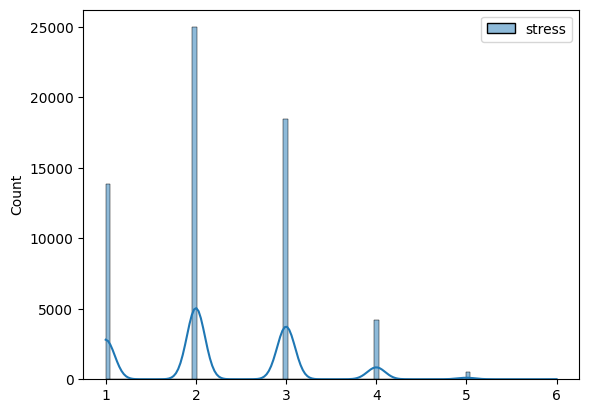

In [26]:
sns.histplot(data = {"stress": ds['stress']}, 
             kde=True)

In [27]:
len(ds.loc[ds['stress'] == 6])

24

In [28]:
len(ds.loc[ds['stress'] == 5])

535

In [29]:
len(ds.loc[ds['stress'] == 4])

4180

## Выяснение весов классов

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [31]:
# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(ds['stress']), y=ds['stress'])
class_weights

array([7.45744988e-01, 4.14199880e-01, 5.59762897e-01, 2.47380383e+00,
       1.93280374e+01, 4.30854167e+02])

In [32]:
ds.loc[ds['stress'] == 2]

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
0,румяной,2,3,румяный,7,7
5,купюру,2,3,купюра,6,6
7,культурной,2,3,культурный,10,10
9,маркерные,2,4,маркерный,9,9
11,кровавым,2,3,кровавый,8,8
...,...,...,...,...,...,...
63433,экзамена,2,4,экзамен,8,7
63434,культурой,2,3,культура,9,8
63435,объемной,2,3,объемный,8,8


## Балансировка даных в ручную

## Unsamplyng

In [33]:
ds.loc[ds['lemma'] == 'яшка']

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,
360,яшка,2,2,яшка,4,4


In [34]:
df_empty = ds[0:0]
df_empty

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
id,,,,,,


In [35]:
uniq_lemma_2 = np.unique(ds.loc[ds['stress'] == 2]['lemma'])
len(uniq_lemma_2)

9808

In [36]:
nds_2 = df_empty

In [37]:
for uniq_lemma in uniq_lemma_2:
    one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 2)].sample(1)
    nds_2 = pd.concat([nds_2, one_uniq_lemmas_word], ignore_index=True, axis=0)
nds_2.reset_index(drop=True)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
0,аббас,2,2,аббас,5,5
1,аббата,2,3,аббат,6,5
2,аббатства,2,3,аббатство,9,9
3,абдул,2,2,абдул,5,5
4,абзацы,2,3,абзац,6,5
...,...,...,...,...,...,...
9803,яснее,2,3,ясный,5,5
9804,ясон,2,2,ясон,4,4
9805,ячейки,2,3,ячейка,6,6
9806,ячмень,2,2,ячмень,6,6


In [38]:
uniq_lemma_3 = np.unique(ds.loc[ds['stress'] == 3]['lemma'])
len(uniq_lemma_3)

7158

In [39]:
nds_3 = df_empty

In [40]:
for uniq_lemma in uniq_lemma_3:
    one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 3)].sample(1)
    nds_3 = pd.concat([nds_3, one_uniq_lemmas_word], ignore_index=True, axis=0)
nds_3.reset_index(drop=True)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
0,аарона,3,4,аарон,6,5
1,абажуром,3,4,абажур,8,6
2,абаза,3,3,абаз,5,4
3,абганерово,3,5,абганерово,10,10
4,абдула,3,3,абдул,6,5
...,...,...,...,...,...,...
7153,ясновидящая,3,6,ясновидящая,11,11
7154,ясновидящие,3,6,ясновидящий,11,11
7155,ясногорск,3,3,ясногорск,9,9
7156,ястребов,3,3,ястреб,8,6


## Create a 1 class datas

In [41]:
uniq_lemma_1 = np.unique(ds.loc[ds['stress'] == 1]['lemma'])
len(uniq_lemma_1)

5827

In [42]:
nds_1 = df_empty

In [43]:
for uniq_lemma in uniq_lemma_1:
    try:
        one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 1)].sample(2)
    except ValueError:
        one_uniq_lemmas_word = ds.loc[(ds['lemma'] == uniq_lemma) & (ds['stress'] == 1)].sample(1)
    nds_1 = pd.concat([nds_1, one_uniq_lemmas_word], ignore_index=True, axis=0)
nds_1.reset_index(drop=True)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
0,абхазию,1,4,абхазия,7,7
1,абхазия,1,4,абхазия,7,7
2,абэ,1,2,абэ,3,3
3,авва,1,2,авва,4,4
4,августу,1,3,август,7,6
...,...,...,...,...,...,...
8880,ящеры,1,3,ящер,5,4
8881,ящерица,1,4,ящерица,7,7
8882,ящерицы,1,4,ящерица,7,7
8883,ящика,1,3,ящик,5,4


## Create new DS with 1 and new 2 and 3 classes

In [44]:
nds = pd.concat([nds_1, nds_2, nds_3], ignore_index=True, axis=0)
nds = nds.reset_index(drop=True)

## Oversampling

In [45]:
words_with_4_s = ds.loc[ds['stress'] == 4].reset_index(drop=True)
for _ in range(0, int(10000/len(words_with_4_s))):
    nds = pd.concat([nds, words_with_4_s], ignore_index=True, axis=0)
    nds.reset_index(drop=True)

In [46]:
words_with_5_s = ds.loc[ds['stress'] == 5].reset_index(drop=True)

In [47]:
words_with_6_s = ds.loc[ds['stress'] == 6].reset_index(drop=True)

In [48]:
nds = pd.concat([nds, words_with_5_s, words_with_6_s], ignore_index=True, axis=0)
nds = nds.reset_index(drop=True)

In [49]:
words_with_5_s = ds.loc[ds['stress'] == 5].reset_index(drop=True)
for _ in range(0, int(10000/len(words_with_5_s))):
    nds = pd.concat([nds, words_with_5_s], ignore_index=True, axis=0)
    nds.reset_index(drop=True)

In [50]:
words_with_6_s = ds.loc[ds['stress'] == 6].reset_index(drop=True)
for _ in range(0, int(10000/len(words_with_6_s))):
    nds = pd.concat([nds, words_with_6_s], ignore_index=True, axis=0)
    nds.reset_index(drop=True)

<Axes: ylabel='Count'>

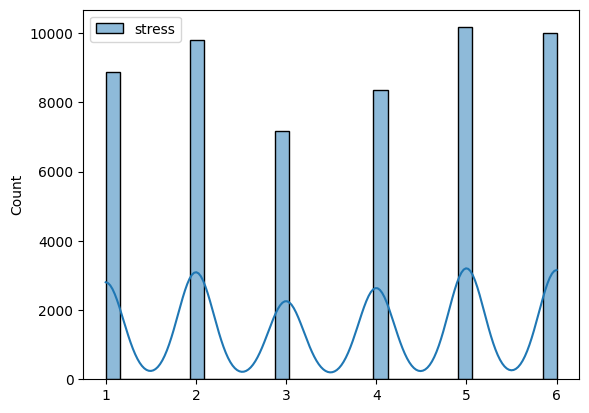

In [51]:
sns.histplot(data = {"stress": nds['stress']}, 
             kde=True)

<Axes: ylabel='Count'>

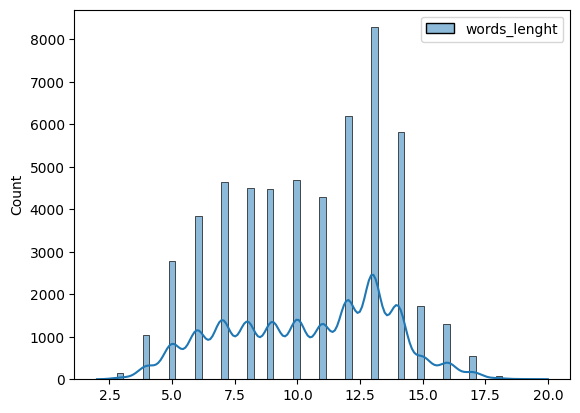

In [52]:
sns.histplot(data = {"words_lenght": nds['words_lenght']}, 
             kde=True)

In [53]:
nds.loc[nds['words_lenght'] == 13]

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
5,августовского,1,5,августовский,13,12
105,архангельском,1,4,архангельский,13,13
982,внутренностей,1,4,внутренность,13,12
1425,высвободиться,1,5,высвобождаться,13,14
2034,девственности,1,4,девственность,13,13
...,...,...,...,...,...,...
54373,удовлетворены,6,6,удовлетворять,13,13
54375,литературовед,6,6,литературовед,13,13
54378,интернационал,6,6,интернационал,13,13
54379,академгородок,6,6,академгородок,13,13


### Old experiments

# Токенизируем слово и лемму

In [54]:
nds = pd.concat([nds, nds], ignore_index=True, axis=0)
ds = nds.reset_index(drop=True)

In [55]:
letter_list = ['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']
letter_by_number = {}
i = 1
for letter in letter_list:
    letter_by_number[letter] = i
    i+=1
letter_by_number

{'а': 1,
 'б': 2,
 'в': 3,
 'г': 4,
 'д': 5,
 'е': 6,
 'ё': 7,
 'ж': 8,
 'з': 9,
 'и': 10,
 'й': 11,
 'к': 12,
 'л': 13,
 'м': 14,
 'н': 15,
 'о': 16,
 'п': 17,
 'р': 18,
 'с': 19,
 'т': 20,
 'у': 21,
 'ф': 22,
 'х': 23,
 'ц': 24,
 'ч': 25,
 'ш': 26,
 'щ': 27,
 'ъ': 28,
 'ы': 29,
 'ь': 30,
 'э': 31,
 'ю': 32,
 'я': 33}

In [56]:
len(letter_by_number)

33

In [57]:
# Tokenize words
for i in range(0, max_words_lenght):
    ds[f'wl{i+1}'] = [(letter_by_number[word[i]] if len(word) > i else 0) for word in ds['word']]
    # is letter vowel?
    # ds[f'is_wl_v{i+1}'] = [(1 if (len(word) > i and word[i] in vowels) else 0) for word in ds['word']]
    # # How many vowels in the word?
    # i = 0
    # num_lemmas_syllables = 0
    # for id_ in ds['id']:
    #     word = ds.loc[ds['id'] == id_]['word']
    #     for letter in word:
    #         if letter in vowels:
    #             num_lemmas_syllables += 1
    #     ds.loc[ds['id'] == id_, 'num_lemmas_syllables'] = num_lemmas_syllables

In [58]:
# pd.set_option('display.max_columns', None)
ds.sample(3)

,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght,wl1,wl2,wl3,wl4,...,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20
27511,аудиторией,4,6,аудитория,10,9,1,21,5,10,...,0,0,0,0,0,0,0,0,0,0
86607,дискредитации,4,6,дискредитация,13,13,5,10,19,12,...,24,10,10,0,0,0,0,0,0,0
19605,выдавалась,3,4,выдаваться,10,10,3,29,5,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# pd.set_option('display.max_columns', None)
ds.drop(['word', 'lemma'], axis=1).corr()

,stress,num_syllables,words_lenght,lemmas_lenght,wl1,wl2,wl3,wl4,wl5,wl6,...,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20
stress,1.000000,0.879024,0.805040,0.797148,0.086600,-0.040635,-0.083110,-0.106801,0.062608,0.127191,...,0.503033,0.544062,0.476336,0.349363,0.174036,0.156834,0.113636,0.021353,0.004430,0.002810
num_syllables,0.879024,1.000000,0.898280,0.863956,0.062053,-0.042141,-0.067894,-0.086353,0.069107,0.165790,...,0.584792,0.590875,0.506295,0.386005,0.229632,0.175993,0.109094,0.041505,0.020948,0.011718
words_lenght,0.805040,0.898280,1.000000,0.965170,0.078319,-0.024533,-0.035767,-0.037470,0.097569,0.207874,...,0.634088,0.637073,0.618728,0.547452,0.390464,0.341104,0.229959,0.101610,0.057718,0.034646
lemmas_lenght,0.797148,0.863956,0.965170,1.000000,0.076204,-0.029863,-0.033422,-0.050889,0.094763,0.198035,...,0.608002,0.621172,0.605718,0.538937,0.373664,0.329912,0.221713,0.098201,0.056330,0.033421
wl1,0.086600,0.062053,0.078319,0.076204,1.000000,-0.028951,-0.069264,-0.010992,0.068866,0.077055,...,0.020435,0.004980,0.064854,0.056366,-0.029758,0.047184,0.158117,0.016636,0.008122,0.007337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wl16,0.156834,0.175993,0.341104,0.329912,0.047184,0.073122,-0.005798,0.026459,0.050626,0.071038,...,0.169184,0.140314,0.268971,0.333446,0.586704,1.000000,0.555388,0.218889,0.083896,0.020773
wl17,0.113636,0.109094,0.229959,0.221713,0.158117,-0.007572,-0.072046,0.003553,0.065991,0.049477,...,0.136469,0.101898,0.166678,0.200601,0.196117,0.555388,1.000000,0.322436,0.124385,0.074150
wl18,0.021353,0.041505,0.101610,0.098201,0.016636,-0.006261,-0.022162,0.004734,0.001309,-0.000970,...,0.044841,0.023670,0.037851,0.076268,0.125431,0.218889,0.322436,1.000000,0.318456,0.163224
wl19,0.004430,0.020948,0.057718,0.056330,0.008122,0.001034,-0.001227,0.009902,0.012818,-0.001604,...,0.033265,0.016538,0.026118,0.037258,0.049639,0.083896,0.124385,0.318456,1.000000,0.575675


In [60]:
ds.drop(['word', 'lemma', 'words_lenght', 'lemmas_lenght'], axis=1).corr()['stress'].to_list()

[1.0,
 0.8790244957675893,
 0.08659990245090096,
 -0.04063516401906326,
 -0.08311000278530845,
 -0.10680072476330048,
 0.06260769207738881,
 0.12719073454959529,
 0.2171722605833767,
 0.35051700974619493,
 0.4984355760993791,
 0.5205759324453413,
 0.5030327899876279,
 0.5440621459385515,
 0.4763361438307432,
 0.34936278352977285,
 0.17403568451918447,
 0.15683350763187479,
 0.11363575176869273,
 0.021353371047680463,
 0.004430174878256064,
 0.0028102260609101514]

# Prepare data

In [61]:
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, LeakyReLU, Conv1D, MaxPooling1D, Embedding, Flatten
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

2024-04-21 17:37:47.040572: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 17:37:47.044758: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 17:37:47.089288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 17:37:48.091205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [62]:
# ds_ = ds.drop(['id', 'word', 'lemma', 'words_lenght', 'lemmas_lenght'], axis=1)
ds_ = ds.drop(['word', 'lemma'], axis=1)
# ds_ = nds.drop(['word', 'lemma'], axis=1)

In [63]:
from sklearn.utils import shuffle
ds_ = shuffle(ds_)

In [64]:
# X, y = df.values[:, :-1], df.values[:, -1]
X = ds_.drop(['stress', 'num_syllables', 'words_lenght', 'lemmas_lenght'], axis=1)
# y = ds_['stress']

In [65]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
y = pd.DataFrame(encoder.fit_transform(ds_[['stress']]).toarray())
# y = pd.DataFrame(ds_[['stress']])

In [66]:
# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(ds_['stress']), y=ds_['stress'])
class_weights

array([1.02014631, 0.92414356, 1.2662755 , 1.08421053, 0.89168716,
       0.90567546])

In [67]:
i = 0
class_weights_dict = {}
for e in class_weights:
    class_weights_dict[e] = e
    i+=1

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)

In [79]:
pd.set_option('display.max_columns', None)
X_train

,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20
69905,17,18,16,2,6,8,12,21,0,0,0,0,0,0,0,0,0,0,0,0
76876,16,19,15,1,19,20,10,13,10,0,0,0,0,0,0,0,0,0,0,0
53712,17,6,15,16,17,16,13,10,19,20,10,18,16,13,0,0,0,0,0,0
61845,20,6,18,17,12,10,14,0,0,0,0,0,0,0,0,0,0,0,0,0
106597,21,5,16,3,13,6,20,3,16,18,6,15,29,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23242,17,16,8,6,13,20,6,3,26,10,6,0,0,0,0,0,0,0,0,0
24822,19,16,19,20,1,3,13,33,32,27,10,14,0,0,0,0,0,0,0,0
6799,19,16,3,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6705,19,14,16,25,6,15,15,16,11,0,0,0,0,0,0,0,0,0,0,0


In [80]:
y_train

,0,1,2,3,4,5
55459,0.0,1.0,0.0,0.0,0.0,0.0
92116,0.0,0.0,1.0,0.0,0.0,0.0
76287,0.0,0.0,0.0,0.0,0.0,1.0
59071,1.0,0.0,0.0,0.0,0.0,0.0
60877,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
98807,0.0,0.0,1.0,0.0,0.0,0.0
94100,0.0,0.0,1.0,0.0,0.0,0.0
43534,1.0,0.0,0.0,0.0,0.0,0.0
37939,1.0,0.0,0.0,0.0,0.0,0.0


In [81]:
n_futures = len(X.columns)
n_futures

20

# Trying Ansables

# Trying AI

In [82]:
def get_model():
    # Create a model
    model = Sequential()
    
    # model.add(BatchNormalization())
    
    # Add input layer
    # model.add(Dense(83, activation='softmax', input_shape = (n_futures,) ))
    # model.add(Dense(100, activation='relu', input_shape = (n_futures,) ))
    model.add(Embedding(input_dim=n_futures*2, output_dim=40))
    
    # model.add(Dropout(0.1))
    # model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.1))
    # model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    # model.add(Conv1D(filters=20 , kernel_size=4, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=20, kernel_size=10, strides=1, padding='same', activation='elu'))
    # model.add(MaxPooling1D(2))
    model.add(MaxPooling1D(1))
    
    # model.add(Dense(100, activation='relu', input_shape = (n_futures,) ))
    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.1))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(100, activation='relu'))
    
    # model.add(Conv1D(filters=20 , kernel_size=4, strides=1, padding='same', activation='relu'))
    # model.add(MaxPooling1D(2))
    # model.add(Dense(100, activation='relu'))
    
    # model.add(Dropout(0.2))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    
    # output layer
    model.add(Dense(6, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  # optimizer='adam', 
                  # optimizer='rmsprop',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'],
                 )
    return model

In [84]:
# # # Compile

# # model.compile(loss='mse',              
# #               # optimizer=Adam(learning_rate=0.2), 
# #               # optimizer='adam',
# #               optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
# #               # metrics=['mae'])
# #               metrics=['mse'])

model = get_model()
print(model.summary()) # Выводим структуру сети
# Train NN
history=model.fit(X_train,
                  y_train,
                  batch_size=300,
                  epochs=50,
                  class_weight=class_weights_dict,
                  # Подавляем вывол протоколов обучения.
                  # verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  # validation_split = 0.2)
                 )



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.6314 - loss: 0.9123
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7872 - loss: 0.5006
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8147 - loss: 0.4330
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.8340 - loss: 0.3966
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8424 - loss: 0.3773
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.8550 - loss: 0.3523
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8587 - loss: 0.3388
Epoch 8/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.8615 - loss: 0.3293
Epoch 9/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8688 - loss: 0.3154
Epoch 10/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 0.8702 - loss: 0.3106
Epoch 11/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.8756 - loss: 0.3006
Epoch 12/50
327/327 ━━━━━

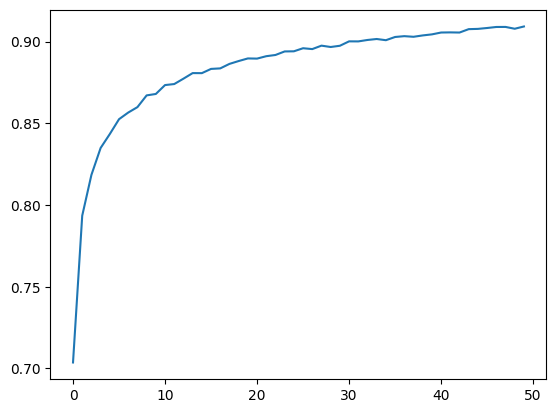

In [85]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['hindle'])
plt.show()

In [95]:
test_predictions = (model.predict(X_test)>0.5).astype("int32")

340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [100]:
score = accuracy_score(y_test, test_predictions)
print('Accuracy: ', score)

Accuracy:  0.9125678036223224


In [76]:
X

,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20
35713,1,3,20,16,18,6,22,6,18,1,20,29,0,0,0,0,0,0,0,0
1748,4,16,13,29,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43565,4,1,9,16,15,16,12,16,19,10,13,12,10,0,0,0,0,0,0,0
107192,9,1,18,6,12,16,14,6,15,5,16,3,1,13,0,0,0,0,0,0
62702,25,1,18,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23251,17,16,9,16,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56485,5,6,20,10,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81689,3,9,18,29,3,16,16,17,1,19,15,29,23,0,0,0,0,0,0,0
100017,18,6,3,16,13,32,24,10,16,15,6,18,0,0,0,0,0,0,0,0


Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.6382 - loss: 0.9041
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.7804 - loss: 0.5207
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8134 - loss: 0.4433
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.8271 - loss: 0.4125
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8385 - loss: 0.3833
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8438 - loss: 0.3749
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8532 - loss: 0.3534
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8597 - loss: 0.3379
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8557 - loss: 0.3444
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8655 - loss: 0.3223
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8693 - loss: 0.3126
Epoch 12/50
291/291 ━━━━━━━━━━

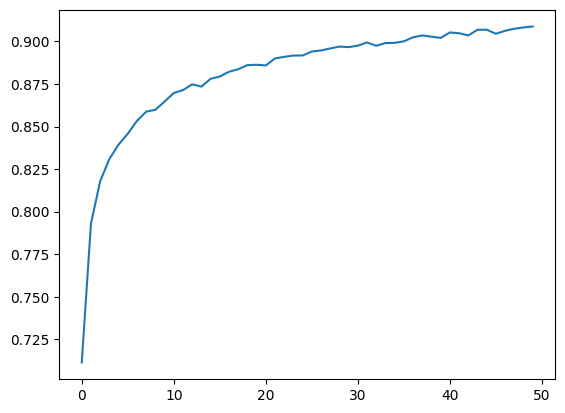

Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.6364 - loss: 0.9071
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.7807 - loss: 0.5135
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.8033 - loss: 0.4657
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.8181 - loss: 0.4312
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8316 - loss: 0.3994
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.8447 - loss: 0.3703
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8442 - loss: 0.3678
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8578 - loss: 0.3403
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.8609 - loss: 0.3353
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8633 - loss: 0.3253
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8642 - loss: 0.3202
Epoch 12/50
291/291 ━━━━━━━━━━

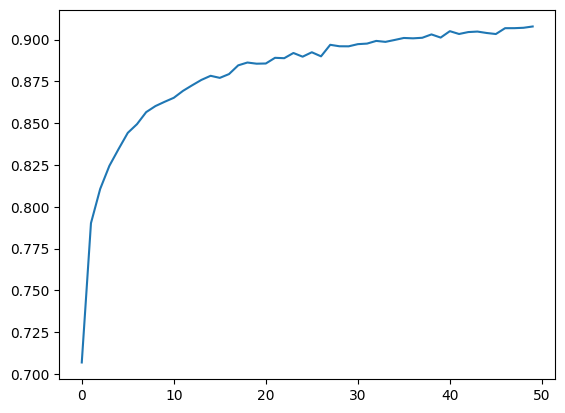

Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.6299 - loss: 0.9216
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7768 - loss: 0.5258
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8098 - loss: 0.4505
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8177 - loss: 0.4321
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8341 - loss: 0.3936
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8457 - loss: 0.3688
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8496 - loss: 0.3648
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8562 - loss: 0.3445
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8587 - loss: 0.3367
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8641 - loss: 0.3260
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8566 - loss: 0.3447
Epoch 12/50
291/291 ━━━━━━━━━━

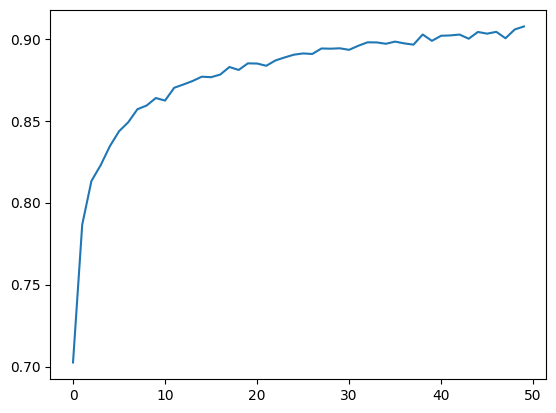

Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6291 - loss: 0.9137
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.7795 - loss: 0.5173
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8087 - loss: 0.4527
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8285 - loss: 0.4074
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8349 - loss: 0.3907
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8410 - loss: 0.3780
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8523 - loss: 0.3549
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8559 - loss: 0.3398
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8584 - loss: 0.3339
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8674 - loss: 0.3166
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.8714 - loss: 0.3089
Epoch 12/50
291/291 ━━━━━━━━━━

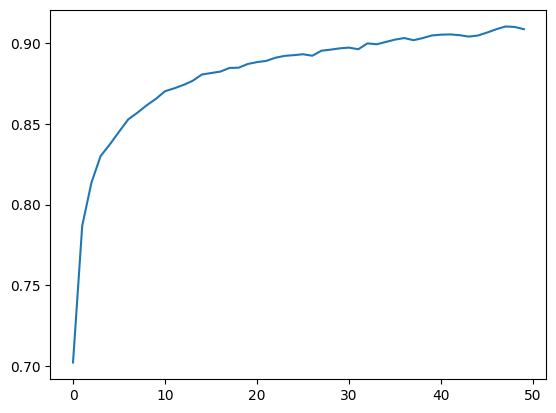

Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.6317 - loss: 0.9133
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7803 - loss: 0.5122
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8148 - loss: 0.4410
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8243 - loss: 0.4143
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8410 - loss: 0.3752
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8467 - loss: 0.3688
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8540 - loss: 0.3506
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8594 - loss: 0.3353
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8604 - loss: 0.3378
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8639 - loss: 0.3243
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8675 - loss: 0.3167
Epoch 12/50
291/291 ━━━━━━━━━━

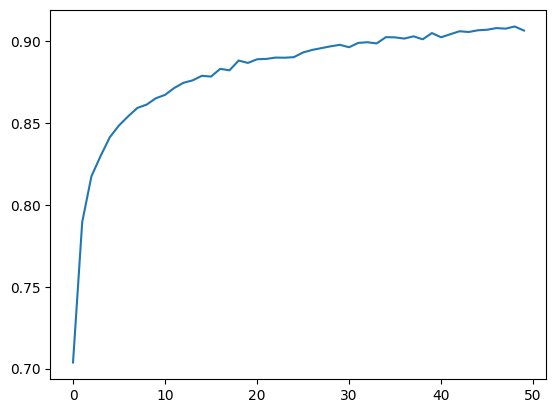

In [77]:
from sklearn.model_selection import KFold

kFold = KFold(5, shuffle=True, random_state=1)

for train, test in kFold.split(X, y):
    model = None
    model = get_model()
    # history = model.evaluate(X.iloc[train, :], y.iloc[train, :]) #, X.iloc[test, :], y.iloc[test, :])
    history=model.fit(X.iloc[train, :],
                      y.iloc[train, :],
                      batch_size=300,
                      epochs=50,
                      class_weight=class_weights_dict,
                      # Подавляем вывол протоколов обучения.
                      # verbose=0,
                      # Используем 20% обучающих данных для валидации.
                      # validation_split = 0.2)
                     )
    plt.plot(history.history['accuracy'])
    # plt.plot(history.history['hindle'])
    plt.show()

# Get model trained on full data

In [101]:
model_f = get_model()

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.6479 - loss: 0.8742
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.7936 - loss: 0.4865
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.8208 - loss: 0.4239
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.8371 - loss: 0.3876
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8463 - loss: 0.3646
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8553 - loss: 0.3466
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.8615 - loss: 0.3320
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8663 - loss: 0.3202
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8675 - loss: 0.3155
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8715 - loss: 0.3069
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8751 - loss: 0.2967
Epoch 12/50
363/363 ━━━━━━━━━━

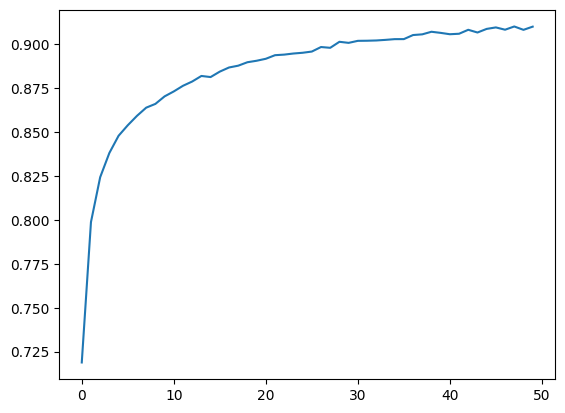

In [103]:
history_f=model_f.fit(X,
                  y,
                  batch_size=300,
                  epochs=50,
                  class_weight=class_weights_dict,
                  # Подавляем вывол протоколов обучения.
                  # verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  # validation_split = 0.2)
                 )
plt.plot(history_f.history['accuracy'])
# plt.plot(history.history['hindle'])
plt.show()

In [107]:
model_f.save("./model/model.keras")